In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [16]:
path = r"C:\Users\gagan\Desktop\Mission Robosoft\Machine Learning-A-Z\Machine Learning A-Z (Codes and Datasets)\Part 3 - Classification\Section 15 - K-Nearest Neighbors (K-NN)\Python\Social_Network_Ads.csv"
df = pd.read_csv(path)

In [17]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [19]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2)

In [21]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [22]:
y_pred = model.predict(x_test)

In [23]:
model.predict(scaler.transform([[30,87000]]))

array([0], dtype=int64)

In [24]:
np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0,

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)

array([[64,  4],
       [ 3, 29]], dtype=int64)

In [26]:
accuracy_score(y_test, y_pred)

0.93

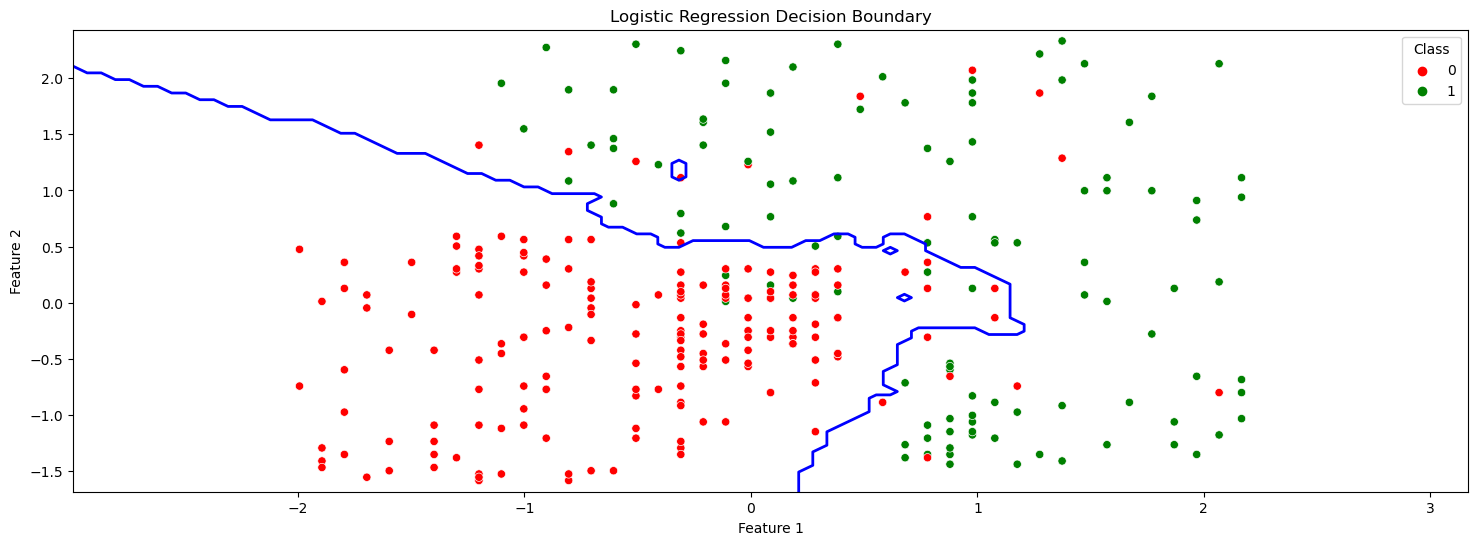

In [27]:
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
xy = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(xy).reshape(xx.shape)
plt.figure(figsize=(18, 6))
sns.scatterplot(x=x_train[:, 0], y=x_train[:, 1], hue=y_train, palette=['red', 'green'])
plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='blue')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary")
plt.legend(title="Class")
plt.ylim((min(x_test[:, 1]) - 0.1, max(x_test[:, 1]) + 0.1))
plt.show()  

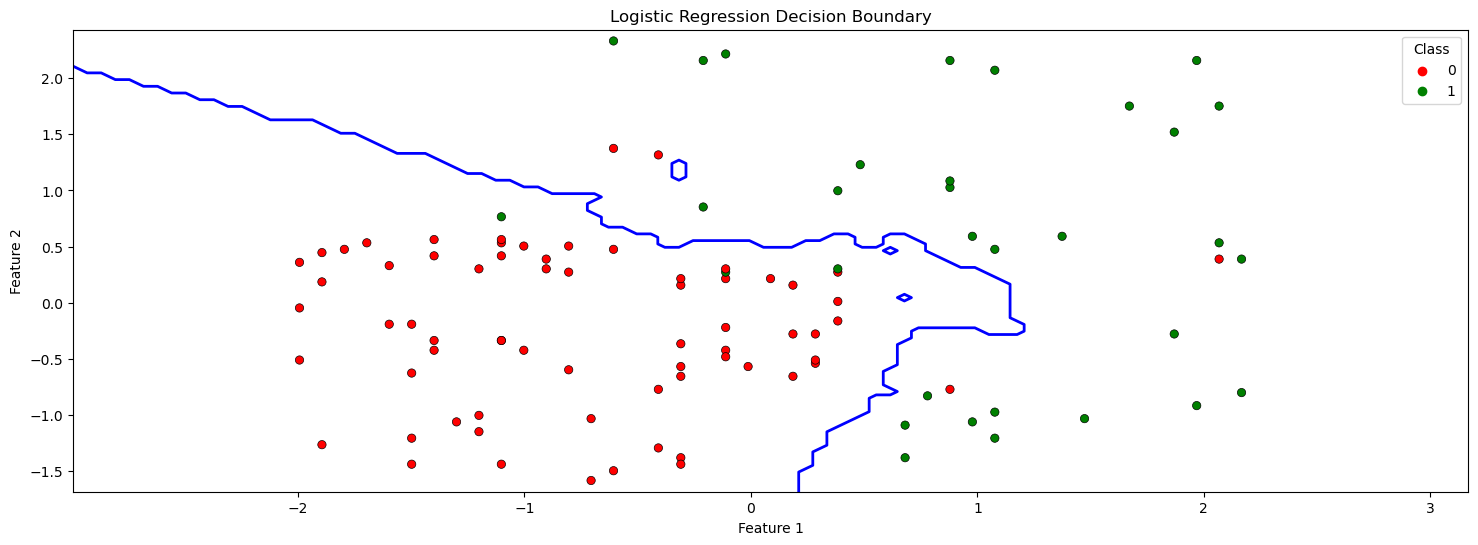

In [28]:
x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
xy = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(xy).reshape(xx.shape)
plt.figure(figsize=(18, 6))
sns.scatterplot(x=x_test[:, 0], y=x_test[:, 1], hue=y_test, palette=['red', 'green'], edgecolor='black')
plt.contour(xx, yy, Z, levels=[0.5], linewidths=    2, colors='blue')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.ylim((min(x_test[:, 1]) - 0.1, max(x_test[:, 1]) + 0.1))
plt.title("Logistic Regression Decision Boundary")
plt.legend(title="Class")
plt.show()